In [1]:
#!pip install keras-tuner --upgrade

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import keras_tuner as kt

In [3]:
data = pd.read_csv('Alphabets_data.csv')

In [4]:
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [30]:
data.shape

(20000, 17)

In [36]:
print("\nChecking for missing values:")
print(data.isnull().sum())


Checking for missing values:
letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


In [38]:
X = data.drop('letter', axis=1)  # dropping 'letter' from features
y = data['letter']               # keeping 'letter' as target

In [40]:
# Encode labels if they are not numeric
le = LabelEncoder()
y = le.fit_transform(y)

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
X

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [46]:
y

array([19,  8,  3, ..., 19, 18,  0])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [50]:
print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (16000, 16)
Test set shape: (4000, 16)


In [52]:
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),    # 👈 Correct way to define input shape
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(le.classes_), activation='softmax')  # Output layer for multi-class classification
])

In [54]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3837 - loss: 2.2486 - val_accuracy: 0.7284 - val_loss: 0.9127
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7717 - loss: 0.8059 - val_accuracy: 0.8250 - val_loss: 0.6377
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8275 - loss: 0.6019 - val_accuracy: 0.8472 - val_loss: 0.5263
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8639 - loss: 0.4712 - val_accuracy: 0.8644 - val_loss: 0.4547
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8827 - loss: 0.4003 - val_accuracy: 0.8875 - val_loss: 0.3969
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9003 - loss: 0.3395 - val_accuracy: 0.8956 - val_loss: 0.3609
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9130 - loss: 0.2993 - val_accuracy: 0.9006 - val_loss: 0.3449
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9225 - loss: 0.2581 - val_accuracy: 0.

In [57]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9489 - loss: 0.1546 
Test Accuracy: 0.9442


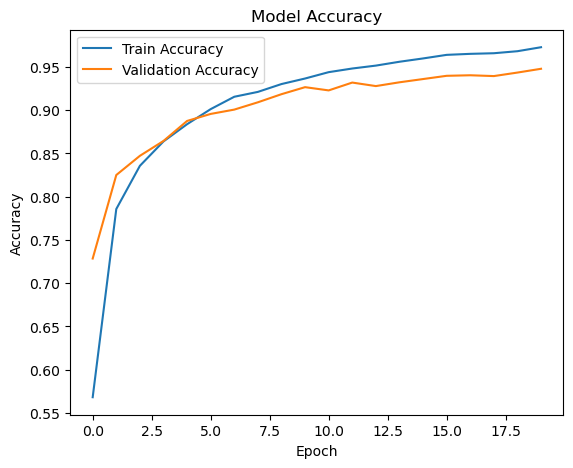

In [58]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


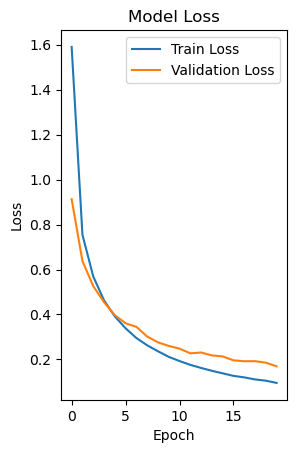

In [59]:
# Plot training & validation loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [60]:
y_pred_probs = model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [61]:
# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)

In [62]:
# Decode predictions to original letters
y_pred_letters = le.inverse_transform(y_pred_classes)
y_true_letters = le.inverse_transform(y_test)

In [63]:
# See few sample predictions
for i in range(10):
    print(f"Actual: {y_true_letters[i]} - Predicted: {y_pred_letters[i]}")

Actual: R - Predicted: R
Actual: M - Predicted: M
Actual: B - Predicted: B
Actual: P - Predicted: P
Actual: J - Predicted: J
Actual: L - Predicted: L
Actual: P - Predicted: P
Actual: G - Predicted: G
Actual: Z - Predicted: Z
Actual: V - Predicted: V


In [64]:
from sklearn.metrics import confusion_matrix, classification_report


In [65]:
cm = confusion_matrix(y_test, y_pred_classes)


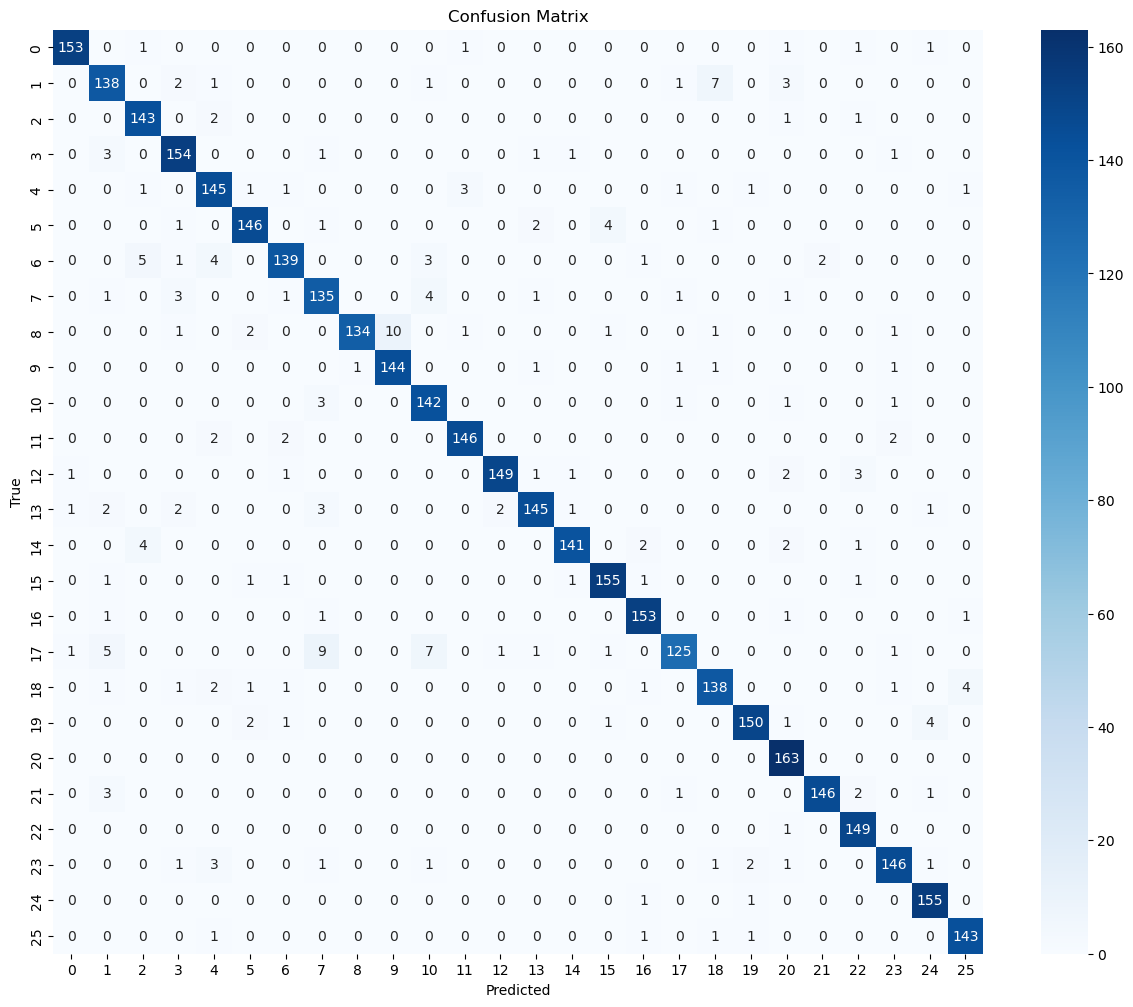

In [66]:
plt.figure(figsize=(15,12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [67]:
# Classification report
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))

              precision    recall  f1-score   support

           A       0.98      0.97      0.97       158
           B       0.89      0.90      0.90       153
           C       0.93      0.97      0.95       147
           D       0.93      0.96      0.94       161
           E       0.91      0.94      0.92       154
           F       0.95      0.94      0.95       155
           G       0.95      0.90      0.92       155
           H       0.88      0.92      0.90       147
           I       0.99      0.89      0.94       151
           J       0.94      0.97      0.95       149
           K       0.90      0.96      0.93       148
           L       0.97      0.96      0.96       152
           M       0.98      0.94      0.96       158
           N       0.95      0.92      0.94       157
           O       0.97      0.94      0.96       150
           P       0.96      0.96      0.96       161
           Q       0.96      0.97      0.97       157
           R       0.95    